In [ ]:
import pandas as pd
#현재 데이터 서울 5년치 날씨 (시간단위) 
##교체필요##
#서울, 부산, 제주, 광주, 강원 
#2020년부터 22년 5월 11일까지 데이터

df1 = pd.read_csv('/content/drive/MyDrive/weather_k2020.csv',encoding = 'cp949')#전국 2020년
df2 = pd.read_csv('/content/drive/MyDrive/weather_k2021.csv',encoding = 'cp949')
df3 = pd.read_csv('/content/drive/MyDrive/weather_k2022.csv',encoding = 'cp949')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# 사이즈 체크
df1.shape, df2.shape, df3.shape

((832179, 28), (829917, 28), (296399, 28))

In [ ]:
# 데이터 합치기 
df = pd.concat([df1,df2,df3]).reset_index(drop=True)

# 타겟 구성 값 결측치 처리
df['강수량(mm)'] = df['강수량(mm)'].fillna(0)
df['적설(cm)'] = df['적설(cm)'].fillna(0)

# Target 데이터 생성
df['rain_snow'] = ((df['강수량(mm)'] + df['적설(cm)']) > 0).astype(int)

# Target의 비율 확인
df['rain_snow'].value_counts()

## Target이 1인 데이터가 압도적으로 적으므로 Target이 1인 데이터를 전부 활용
## Target이 0인 데이터 중 지역별로 나누어 200,000개 데이터 생성

0    1800785
1     157710
Name: rain_snow, dtype: int64

In [ ]:
df.shape

(1958495, 29)

In [ ]:
# Target값이 0인 데이터에서 지역별로 균등하게 20000개 추출
df['지점명'].nunique() #[out]95

  ## Target 데이터가 1인 데이터와 0인 데이터 분리

# Target 데이터가 1인 데이터
df_rain = df.query("rain_snow==1")

# Target 데이터가 0인 데이터
df_no_rain = df.drop(index = df_rain.index)

# reset_index
df_rain.reset_index(drop=True)
df_no_rain.reset_index(drop=True)



,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),rain_snow
0,90,속초,2020-01-01 01:00,-2.5,0.0,2.1,230.0,32.0,1.6,-16.9,...,NaN,2000.0,NaN,NaN,-2.6,NaN,NaN,NaN,NaN,0
1,90,속초,2020-01-01 02:00,-2.5,0.0,1.0,230.0,38.0,1.9,-14.9,...,NaN,2000.0,NaN,NaN,-2.7,NaN,NaN,NaN,NaN,0
2,90,속초,2020-01-01 03:00,-2.0,0.0,2.0,180.0,39.0,2.1,-14.1,...,NaN,2000.0,NaN,NaN,-2.6,NaN,NaN,NaN,NaN,0
3,90,속초,2020-01-01 04:00,-1.7,0.0,2.6,250.0,40.0,2.2,-13.5,...,NaN,2000.0,NaN,NaN,-2.5,NaN,NaN,NaN,NaN,0
4,90,속초,2020-01-01 05:00,-1.1,0.0,2.2,200.0,37.0,2.1,-13.9,...,NaN,2000.0,NaN,NaN,-2.5,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800780,295,남해,2022-05-10 19:00,18.2,0.0,0.9,140.0,38.0,7.9,3.6,...,31.0,2000.0,NaN,NaN,21.3,NaN,NaN,NaN,NaN,0
1800781,295,남해,2022-05-10 20:00,14.8,0.0,0.8,250.0,65.0,10.9,8.2,...,28.0,2000.0,NaN,NaN,18.1,NaN,NaN,NaN,NaN,0
1800782,295,남해,2022-05-10 21:00,15.3,0.0,0.9,270.0,58.0,10.0,7.0,...,35.0,2000.0,NaN,NaN,17.2,NaN,NaN,NaN,NaN,0
1800783,295,남해,2022-05-10 22:00,14.5,0.0,0.8,250.0,69.0,11.3,8.8,...,28.0,1882.0,NaN,NaN,16.7,NaN,NaN,NaN,NaN,0


In [ ]:
# 중복데이터 확인
df_no_rain.duplicated().sum(), df_no_rain.duplicated().sum()

(0, 0)

In [ ]:
####################연습####################
########################################
########################################
########################################
'''
number = round((20000/df_no_rain['지점명'].nunique()),0)
number = int(number)
list=[]

a = df_no_rain[(df_no_rain['지점명'] == '서울' )].sample(number, random_state = 42).index
b =df_no_rain[(df_no_rain['지점명'] == '대구' )].sample(number, random_state = 42).index
list.append(a)
list.append(b)

import numpy as np
list = np.array(list).flatten().tolist()
len(list)
'''
########################################
########################################
########################################
########################################

"\nnumber = round((20000/df_no_rain['지점명'].nunique()),0)\nnumber = int(number)\nlist=[]\n\na = df_no_rain[(df_no_rain['지점명'] == '서울' )].sample(number, random_state = 42).index\nb =df_no_rain[(df_no_rain['지점명'] == '대구' )].sample(number, random_state = 42).index\nlist.append(a)\nlist.append(b)\n\nimport numpy as np\nlist = np.array(list).flatten().tolist()\nlen(list)\n"

In [ ]:
# 타겟 데이터가 0인 데이터셋에서 지역별로 균등하게 약 200,000개 데이터 추출
number = round((200000/df_no_rain['지점명'].nunique()),0)
number = int(number)

import numpy as np

no_rain_city = df_no_rain['지점명'].unique().tolist()
city_idx = []

for x in no_rain_city:
  index = df_no_rain[(df_no_rain['지점명'] == x )].sample(number, random_state=42).index
  city_idx.append(index)
  
city_idx = np.array(city_idx).flatten().tolist() ##데이터 
len(city_idx) ##[out]199975


199975

In [ ]:
## 샘플링한 데이터와 Target이 1인 데이터 합쳐서 데이터셋 만들기

target0 = df_no_rain.loc[city_idx]
target1 = df_rain

## 완료 ##
dataset = pd.concat([target0, target1])
dataset.shape

(357685, 29)

In [ ]:
##다시 target값 비율 확인
dataset['rain_snow'].value_counts()

0    199975
1    157710
Name: rain_snow, dtype: int64

In [ ]:
##dataset 살펴보기 
dataset.head()

,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),rain_snow
832461,90,속초,2021-01-12 19:00,0.1,0.0,1.8,360.0,55.0,3.4,-7.8,...,14.0,1215.0,NaN,NaN,-0.6,NaN,NaN,NaN,NaN,0
1665140,90,속초,2022-05-07 21:00,11.6,0.0,1.1,230.0,88.0,11.9,9.6,...,5.0,2874.0,NaN,NaN,12.5,NaN,NaN,NaN,NaN,0
833798,90,속초,2021-03-09 12:00,10.4,0.0,1.8,110.0,67.0,8.4,4.5,...,NaN,1359.0,NaN,NaN,17.8,NaN,NaN,NaN,NaN,0
264,90,속초,2020-01-12 01:00,1.0,0.0,1.7,270.0,53.0,3.5,-7.5,...,51.0,1318.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0
6423,90,속초,2020-09-24 16:00,18.8,0.0,4.3,50.0,80.0,17.3,15.2,...,5.0,1541.0,NaN,NaN,20.4,NaN,NaN,NaN,NaN,0


In [ ]:
# dataset 데이터셋에서 불필요한 컬럼 삭제
dataset.drop(columns=['지점','지점명','일시', '전운량(10분위)', '최저운고(100m )','지면상태(지면상태코드)', '현상번호(국내식)',
                   '5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)','30cm 지중온도(°C)','3시간신적설(cm)','강수량(mm)','적설(cm)' ], inplace=True) 

In [ ]:
# 결측치 확인
dataset.isnull().sum()

기온(°C)            235
풍속(m/s)           487
풍향(16방위)          494
습도(%)             254
증기압(hPa)          330
이슬점온도(°C)         389
현지기압(hPa)         229
해면기압(hPa)         232
일조(hr)         163486
일사(MJ/m2)      265715
중하층운량(10분위)     12015
운형(운형약어)       297335
시정(10m)          2470
지면온도(°C)          297
rain_snow           0
dtype: int64

In [ ]:
# 일조, 일사, 운형 삭제 (Nan 값이 과도하게 많음)
dataset.drop(columns = ['일조(hr)', '일사(MJ/m2)','운형(운형약어)'], inplace=True)

# 결측치는 모두 가까운 이전데이터 사용
dataset.fillna(method='bfill', inplace=True)
dataset.isnull().sum()

기온(°C)         0
풍속(m/s)        0
풍향(16방위)       0
습도(%)          0
증기압(hPa)       0
이슬점온도(°C)      0
현지기압(hPa)      0
해면기압(hPa)      0
중하층운량(10분위)    0
시정(10m)        0
지면온도(°C)       0
rain_snow      0
dtype: int64

In [ ]:
dataset.columns

Index(['기온(°C)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)',
       '현지기압(hPa)', '해면기압(hPa)', '중하층운량(10분위)', '시정(10m)', '지면온도(°C)',
       'rain_snow'],
      dtype='object')

In [ ]:
# 훈련/테스트 데이터셋 나누기
from sklearn.model_selection import train_test_split
target = 'rain_snow'
features = dataset.columns.drop(target).tolist()

def train_test(df):
  train, test = train_test_split(dataset, train_size=0.8, 
                                 stratify=df[target] ,random_state = 42)
  return train, test

train, test = train_test(dataset)
print(train.shape, test.shape)


(286148, 12) (71537, 12)


In [ ]:
# 데이터의 target분포 확인
train['rain_snow'].value_counts(normalize=True)

0    0.559081
1    0.440919
Name: rain_snow, dtype: float64

In [ ]:
# 훈련 데이터에서 훈련/검증 데이터 나누기
train, val = train_test_split(train, train_size=0.8, stratify=train[target], random_state=42)

print(train.shape, val.shape)

(228918, 12) (57230, 12)


In [ ]:
# X,y 값 나누기

def split_Xy(train):
  y_train = train[target]
  X_train = train[features]

  return X_train, y_train
X_train, y_train= split_Xy(train)
X_test, y_test = split_Xy(test)
X_val, y_val = split_Xy(val)

In [ ]:
#pip install pdpbox
#pip install shap
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 80 kB 4.8 MB/s 


In [ ]:
#모델 만들기
from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

pipe = make_pipeline(
    OrdinalEncoder(),
    XGBClassifier(n_estimators=100
                  , random_state=42
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2
                 )
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.8522278525248995
              precision    recall  f1-score   support

           0       0.88      0.85      0.87     31996
           1       0.82      0.85      0.84     25234

    accuracy                           0.85     57230
   macro avg       0.85      0.85      0.85     57230
weighted avg       0.85      0.85      0.85     57230



In [ ]:
train.head()



,기온(°C),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),중하층운량(10분위),시정(10m),지면온도(°C),rain_snow
43483,-4.5,0.5,140.0,68.0,3.0,-9.5,1025.5,1029.5,9.0,661.0,-2.3,1
263138,-0.2,2.2,20.0,52.0,3.1,-8.8,1021.0,1025.8,0.0,1220.0,-2.9,0
470715,13.1,0.1,0.0,89.0,13.4,11.3,984.3,1015.5,0.0,2000.0,13.8,0
1751980,7.0,1.2,110.0,83.0,8.3,4.3,1010.9,1018.3,0.0,1259.0,7.5,0
877120,13.6,6.8,270.0,32.0,5.0,-2.8,919.8,1007.2,0.0,1732.0,15.6,0


In [ ]:
train.head()

,기온(°C),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),중하층운량(10분위),시정(10m),지면온도(°C),rain_snow
43483,-4.5,0.5,140.0,68.0,3.0,-9.5,1025.5,1029.5,9.0,661.0,-2.3,1
263138,-0.2,2.2,20.0,52.0,3.1,-8.8,1021.0,1025.8,0.0,1220.0,-2.9,0
470715,13.1,0.1,0.0,89.0,13.4,11.3,984.3,1015.5,0.0,2000.0,13.8,0
1751980,7.0,1.2,110.0,83.0,8.3,4.3,1010.9,1018.3,0.0,1259.0,7.5,0
877120,13.6,6.8,270.0,32.0,5.0,-2.8,919.8,1007.2,0.0,1732.0,15.6,0


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths=None, fontext = 'ttf')
font_list[:]

['/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/hu

<BarContainer object of 11 artists>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54693 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_

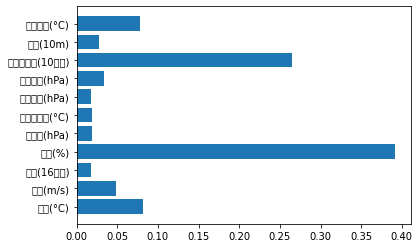

In [ ]:

#특성 중요도
import matplotlib.pyplot as plt

xgb = pipe.named_steps['xgbclassifier']
importances = pd.Series(xgb.feature_importances_, X_train.columns)

fig = plt.figure()
ax = fig.add_subplot()
ax.barh(X_train.columns, importances)




In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 8.8 MB/s 
     |████████████████████████████████| 133 kB 42.6 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=fca6512c896beae336211ca0ae350fe8ee0c26608fceaa81b75d65051ed39b84
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inco

In [ ]:
##실행 X ###

## 두 가지 특성의 특성 중요도가 높게 나왔다
## high-cardinality(에 따른 과적합) 의심
## data leakage 의심

###한글일 깨져서 잘 보이지 않지만 온도, 증하층운량으로 보임###
#순열중요도(Pernutation Importance로 중요도 확인)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    pipe.named_steps['xgbclassifier'], # model
    scoring='accuracy', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_val_transformed = pipe.named_steps['ordinalencoder'].transform(X_val)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_test_transformed, y_pred);



SyntaxError: ignored

In [ ]:

from sklearn.pipeline import Pipeline
# encoder, imputer를 preprocessing으로 묶었습니다. 후에 eli5 permutation 계산에 사용합니다

pipe = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder())),
    ('XGB',  XGBClassifier(n_estimators=100
                  , random_state=42
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2 ))])

pipe.fit(X_train, y_train)
print('검증정확도: ', pipe.score(X_val, y_val))



import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance


# permuter 정의
permuter = PermutationImportance(
    pipe.named_steps['XGB'], # model
    scoring='accuracy', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2)

검증정확도:  0.8522278525248995


In [ ]:
# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_val_transformed = pipe.named_steps['preprocessing'].transform(X_val)
# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_transformed, y_val);

In [ ]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

풍향(16방위)       0.002929
증기압(hPa)       0.004861
이슬점온도(°C)      0.006923
현지기압(hPa)      0.010037
시정(10m)        0.016781
해면기압(hPa)      0.028754
풍속(m/s)        0.031511
중하층운량(10분위)    0.049219
지면온도(°C)       0.075611
기온(°C)         0.085941
습도(%)          0.164945
dtype: float64

In [ ]:
# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.1649 ± 0.0021,습도(%)
0.0859 ± 0.0026,기온(°C)
0.0756 ± 0.0018,지면온도(°C)
0.0492 ± 0.0024,중하층운량(10분위)
0.0315 ± 0.0014,풍속(m/s)
0.0288 ± 0.0010,해면기압(hPa)
0.0168 ± 0.0012,시정(10m)
0.0100 ± 0.0008,현지기압(hPa)
0.0069 ± 0.0010,이슬점온도(°C)
0.0049 ± 0.0002,증기압(hPa)


In [ ]:
##딱히 버릴 것 없이 그대로 진행
##X_test로 진행
y_pred = pipe.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8482743195828732
              precision    recall  f1-score   support

           0       0.88      0.85      0.86     39995
           1       0.82      0.85      0.83     31542

    accuracy                           0.85     71537
   macro avg       0.85      0.85      0.85     71537
weighted avg       0.85      0.85      0.85     71537



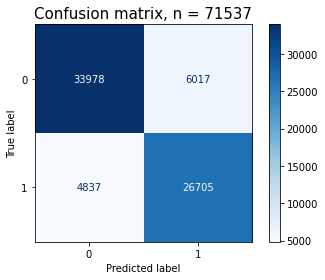

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax)
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)
plt.show()

In [ ]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

dists = { 
    'xgb__n_estimators': [100,300, 500, 800], 
    'xgb__max_depth': [5, 7, 10, 15, 20], 
    'xgb__n_jobs': [-1],
    'learning_rate' : [0.2] 
}

clf = RandomizedSearchCV(
    XGBClassifier(), 
    param_distributions=dists, 
    n_iter=50, 
    cv=10, 
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=10, estimator=XGBClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.2],
                                        'xgb__max_depth': [5, 7, 10, 15, 20],
                                        'xgb__n_estimators': [100, 300, 500,
                                                              800],
                                        'xgb__n_jobs': [-1]},
                   verbose=1)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix
print('최적 하이퍼파라미터: ', clf.best_params_)
y_pred = clf.predict(X_test)
print('검증 정확도:', clf.best_score_)
print('F1:',f1_score(y_test, y_pred))

최적 하이퍼파라미터:  {'xgb__n_jobs': -1, 'xgb__n_estimators': 100, 'xgb__max_depth': 5, 'learning_rate': 0.2}
검증 정확도: 0.8349802081891516
F1: 0.8135529705675697


In [ ]:
df1['지점명'].unique()

array(['속초', '북춘천', '철원', '동두천', '파주', '대관령', '춘천', '백령도', '북강릉', '강릉',
       '동해', '서울', '인천', '원주', '울릉도', '수원', '영월', '충주', '서산', '울진', '청주',
       '대전', '추풍령', '안동', '상주', '포항', '군산', '대구', '전주', '울산', '창원', '광주',
       '부산', '통영', '목포', '여수', '흑산도', '완도', '고창', '순천', '홍성', '제주', '고산',
       '성산', '서귀포', '진주', '강화', '양평', '이천', '인제', '홍천', '태백', '정선군', '제천',
       '보은', '천안', '보령', '부여', '금산', '세종', '부안', '임실', '정읍', '남원', '장수',
       '고창군', '영광군', '김해시', '순창군', '북창원', '양산시', '보성군', '강진군', '장흥', '해남',
       '고흥', '의령군', '함양군', '광양시', '진도군', '봉화', '영주', '문경', '청송군', '영덕',
       '의성', '구미', '영천', '경주시', '거창', '합천', '밀양', '산청', '거제', '남해'],
      dtype=object)